# Assignement 3 - Linear regression with Multiple variables


In this third assignment, you will implement linear regression with multiple variables and get to see it work on data. 

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file LRdata2.txt contains a training set of housing prices (for example in your city). The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

You work is to complete the assignement 3 by filling the missing lines of code


In [32]:
# Some useful libraries to use in this assignment


from numpy import loadtxt, zeros, ones, array, linspace, logspace, mean, std, arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel, scatter, title, plot, contour
import matplotlib
import copy


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

# First step

We are going to plot the dataset and see if we can apply linear regression to fit the data.

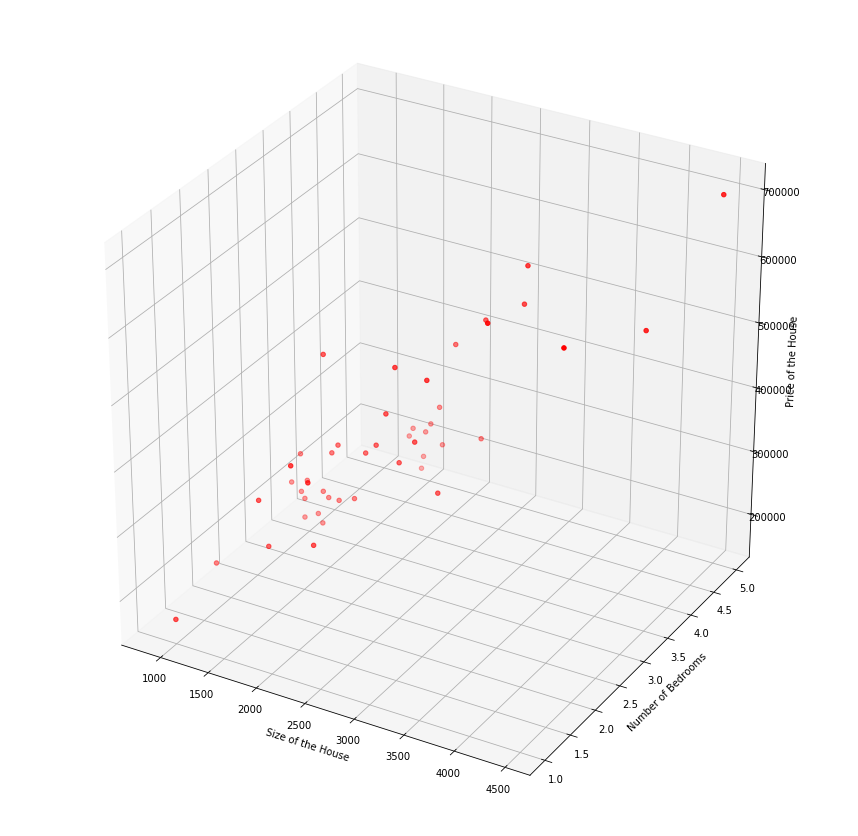

In [33]:

#Load the dataset
data = loadtxt('LRdata2.txt', delimiter=',')


#Plot the data

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25)]:
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('Size of the House')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of the House')
plt.show()

# Question 1

You have to complete the function feature_normalization in order to normalize our inputs and also to get gradient descent works well in practice

In [34]:
#Evaluate the linear regression

def feature_normalization(X):
    '''
    Returns a normalized version of X where the mean value of each feature is 0 and the standard deviation
    is 1. We presented that in the supplementary material.
    '''
    mean_r = []
    std_r = []

    X_norm = copy.copy(X)
    

    # The variable "it" represents the number of features. We will proceed for each one using a for loop.
    it = X.shape[1] 
    for i in range(it):
        # Your code goes here 
        m = mean(X[:,i])
        mean_r.append(m)
        
        s = std(X[:,i])
        std_r.append(s)
        
        
        # End of your code
        
        X_norm[:,i] = (X_norm[:,i] - m)/s
    return X_norm, mean_r, std_r

# Test your code for "feature_normalization" function

You should see results like this :

0.962801191824
0.00999072667146
1.00362503123


In [35]:
x, m, s = feature_normalization(data[:, :2])
print ("Mean : Feature 1 = %.2f and Feature 2 = %.2f" % (m[0], m[1]))
print ("Standard deviation : Feature 1 = %.2f and feature 2 : %.2f" % (s[0], s[1]))


Mean : Feature 1 = 2000.68 and Feature 2 = 3.17
Standard deviation : Feature 1 = 786.20 and feature 2 : 0.75


In [36]:
'''
    this cell to print the mean of the scaled data
'''

x, m, s = feature_normalization(data[:, 0:2])



    
print("size of the house *** \n   new max :",max(x[:,0]),"\n   new min:",min(x[:,0]))
print("numberof bedrooms *** \n   new max:", max(x[:,1]),"\n   new min",min(x[:,1]))

size of the house *** 
   new max : 3.15099325527155 
   new min: -1.461049383046193
numberof bedrooms *** 
   new max: 2.4305037014601525 
   new min -2.882690436615529


# Question 2

You have to complete the function compute_cost that has three parameters: X, y and W

In [37]:
def compute_cost(X, y, W):
    '''
    Compute cost for linear regression
    '''
    # Your code goes here 
    
    #Number of training samples
    m  = y.size
    
    '''
    print ("X :",X.shape)
    print ("W :",W.shape)
    print ("y :",y.shape)
    '''
    
    # Your code goes here
    
    predictions = X.dot(W)
    error = predictions - y
    J = (1 / ( 2 * m)) * error.T.dot(error)
    

    # End of your code

    return J
    # End of your code


# Test your code for "compute_cost" function

You should see results like this :

The initial cost : 6.55915481e+10


In [38]:
X = data[:, :2]
y = data[:, 2]
m = y.size
y.shape = (m, 1)

# Scale features and set them to zero mean
X_norm, mean_r, std_r = feature_normalization(X)

# Add a column of ones to X (interception data)
new_X = ones(shape=(m, 3))
new_X[:, 1:] = X_norm

# Init W and Run Gradient Descent
W = zeros(shape=(3, 1))

J = compute_cost(new_X, y, W)
print ("The initial cost : " + str(J))

The initial cost : [[6.55915481e+10]]


# Question 3

You have to complete the function gradient_descent that has five parameters: X, y, W, alpha and num_iters

alpha: the learning rate

num_iters: the number of iterations before we find the best parameters Ws.

N.B. You should remember that maybe we will have more parameters W

In [39]:
def gradient_descent(X, y, W, alpha, num_iters):
    '''
    Performs gradient descent to learn W by taking num_items gradient steps with learning rate alpha
    '''
    m = y.size
    
    """
        This variable J_prev will keep truck of the previous values of J in order to use them to plot the cost J
        in the last part
    """
    J_prev = zeros(shape=(num_iters, 1))
    
    for i in range(num_iters):
        
        # Your code goes here 
        
        predictions = X.dot(W)
        
        W[0,0] = W[0,0] - alpha * (predictions - y).sum() / m
        W[1,0] = W[1,0] - alpha * ((X[:,1]*(predictions - y)).sum()) / m
        W[2,0] = W[2,0] - alpha * ((X[:,2]*(predictions - y)).sum()) / m
        
        J_prev[i] = compute_cost(X, y, W)
        # End of your code
        
    return W, J_prev

# Question 4

You have to complete the next cell by giving values to two variables: iterations and alpha.

In [45]:
# The model hyperparameters. Play with them by changing their values and see what happened
"""
    In this cell, you should try with different values of the following variables : 
    - iterations : which will the number of times gradient descent will take before it converges to
        the minimum
        
    - alpha : the learning rate. Try these values : 0.01 and 0.02 and 0.03.
"""
# Your initialization goes here
alpha = 0.01
iterations = 500
# End of your initialization

# Question 5

You have to complete the next cell by computing the initial cost, after that computing W after apply gradient descent

In [53]:
X = data[:, :2]
y = data[:, 2]


# Number of training samples
m = y.size

y.shape = (m, 1)

# Scale features and set them to zero mean
x, mean_r, std_r = feature_normalization(X)

# Add a column of ones to X (interception data)
new_X = ones(shape=(m, 3))
new_X[:, 1:3] = x

# Init W and Run Gradient Descent
W = zeros(shape=(3, 1))


# Compute and print the initial cost. Print W after applying gradient descent


# Your code goes here
J = compute_cost(new_X, y, W)
print ("The initial cost : " + str(J))


W,J_history = gradient_descent(new_X, y, W, alpha, iterations)
print("weights :" ,W.flatten())
# End of your code

The initial cost : [[6.55915481e+10]]
weights : [3.38175984e+05 1.20883069e-10 4.45556888e-09]


# Plot the cost

In the cell, you will see the behaviour of the cost after a number of iterations

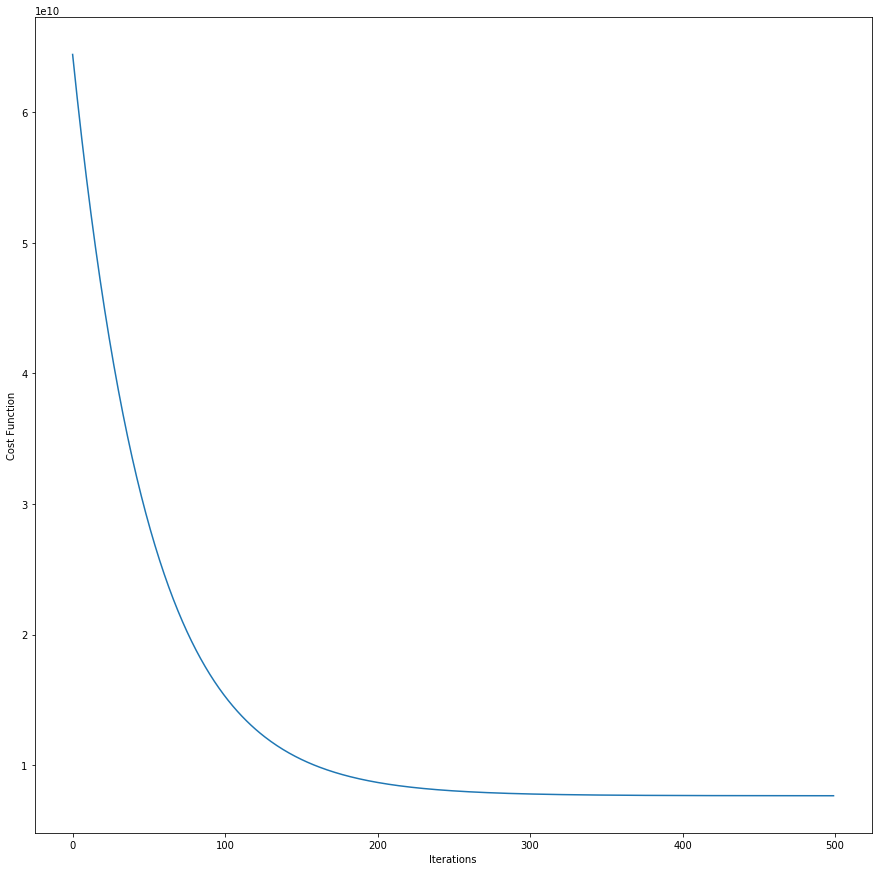

In [47]:
plot(arange(iterations), J_history)
xlabel('Iterations')
ylabel('Cost Function')
show()

In [48]:
#Predict price of a 2000 sq-ft 3 br house

feet_sq = 500.0 # You can try different values here and see the corresponding prices
nb_bedrooms = 2

feature1 = ((feet_sq - mean_r[0]) / std_r[0])
feature2 = ((nb_bedrooms - mean_r[1]) / std_r[1])

price = array([1.0, feature1, feature2]).dot(W)

print ('The price of a house with %.2f sq-ft and %d bedrooms is : %.2f' % (feet_sq, nb_bedrooms, price))

The price of a house with 500.00 sq-ft and 2 bedrooms is : 338175.98
